# **W1D2: Ocean-Atmosphere Reanalysis**

# **Tutorial 6: Ocean Heat Content**

**Week 1, Day 2: State of the Climate - Ocean and Atmospheric Reanalysis**

__Content creators:__ Aurora Basinski

**Content reviewers:** Katrina Dobson, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Chi Zhang, Ohad Zivan

**Content editors:** Brodie, Pearson, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives**
In this tutorial, our primary focus is the ocean's significant role in the climate system, particularly regarding its vast heat capacity. The ocean, having a heat capacity about 1000 times higher than the atmosphere due to its mass and specific heat capacity, is integral to the Earth's thermal equilibrium. It helps in the meridional heat transport from the equator to the poles, facilitated by both atmospheric and oceanic circulation.

The ocean's heat uptake plays a crucial role in mitigating the effects of anthropogenic climate change, as it absorbs about 90% of the excess heat and 25% of human-emitted CO2. This absorption largely occurs in the upper ocean, the region most in contact with the atmosphere.

Through this tutorial, we will dive into understanding the spatial structure of heat in the ocean and how this heat content is changing over time. To do this, we'll employ the [Estimating the Circulation and Climate of the Ocean (ECCO)](https://www.ecco-group.org/) dataset. By the end of this tutorial, you will have a deeper understanding of the dynamics of ocean's heat content and its pivotal role in the Earth's climate system.

In [3]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# Setup
Here we import needed packages, and import ECCO data that has been preprocessed.
* Note: Here working with interpolated data fields to lat-lon grid

In [ ]:
# ABIGAIL need colab pip installs

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import os
import pooch

In [5]:
#Import preprocessed ECCO data. This data is full depth temperature data over 1992 to 2016 (annual mean)
# this file takes about 5 minutes to load
url_theta = "https://osf.io/c8wqt/download"
theta_annual= xr.open_dataset(pooch.retrieve(url_theta, known_hash=None))
theta_annual=theta_annual.THETA
theta_annual=theta_annual.where(theta_annual != 0) #make land points equal to NaN
theta_annual

SHA256 hash of downloaded file: 058d298b4162093b080b49c14cd91f22448a22af8e255cf081e116bc83942990
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.DataArray 'THETA' (year: 25, Z: 50, latitude: 360, longitude: 720)>
array([[[[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [271.24949362, 271.24949362, 271.24949362, ..., 271.24949362,
          271.24949362, 271.24949362],
         [271.2454257 , 271.2454257 , 271.2454257 , ..., 271.2454257 ,
          271.2454257 , 271.2454257 ],
         [271.24057818, 271.24057818, 271.24057818, ..., 271.24057818,
          271.24057818, 271.24057818]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]]]])
Coordinates:
    i          (longitude) int64 0 1 2 3 4 5 6 7 ... 713 714 715 716 717 718 719
    k          (Z) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    j          (latitude) int64 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
    dZ         (Z) float64 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    Zu         (Z) float64 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
    dA         (latitude, longitude) float64 1.349e+07 1.349e+07 ... 1.349e+07
    dX         (latitude, longitude) float64 121.3 121.3 121.3 ... 121.3 121.3
  * year       (year) int64 1992 1993 1994 1995 1996 ... 2013 2014 2015 2016

# Section 1: What is the Vertical Distribution of Heat within the Ocean?

In [6]:
#First let's take the mean over the period 1992 to 1994
subset_theta=theta_annual.sel(year=slice('1992', '1994')).mean('year')

Text(0.5, 1.0, 'Global zonal mean of temperature (C)')

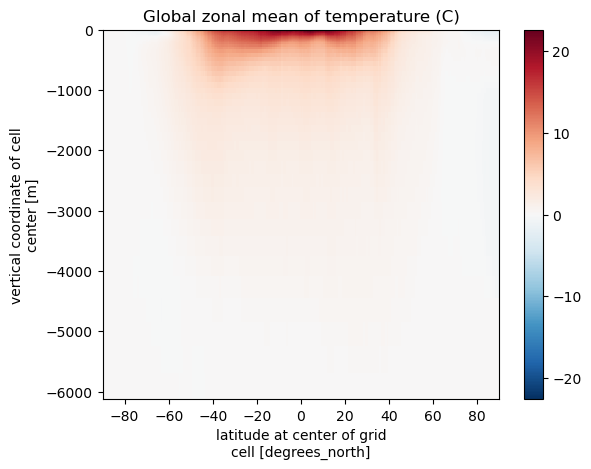

In [7]:
#Let's plot a zonal mean slice of this data. We take a mean just in longitudes by dividing the dA coordinate by the
(((subset_theta-273.15)*subset_theta.dX).sum('longitude')/(subset_theta.dX.sum('longitude'))).plot()
plt.title('Global zonal mean of temperature (C)')

Temperatures are warmest near the ocean's surface and close to the Equator, which suggests that heat is not distributed evenly within the ocean. In this tutorial you will **explore the spatial distribution of heat storage in the ocean (i.e., ocean heat content), and how this distribution is changing over time**. 

Heat is typically measured in Joules, which is equivalent to the units kg$*$m$^2$/s$^2$. To determine the heat content within a specific depth range of the global ocean, i.e., between depth $z_1$ and the surface (height of 0), we can calculate a *volume integral* over the dimensions $x,y,$ and $z$. This integral can be written as:
$$\iiint_{-z_1}^0 c_p*\rho_0*\theta(x,y,z) dz dA$$

Here, $dA$ represents the area integral over the $x$ and $y$ (lat, lon) coordinates. $\rho_0$ is the reference density in units of kg/m$^3$ and $c_p$ is specific heat capacity in units of J/(kg$*$K)

In [8]:
theta_area_int=(subset_theta*subset_theta.dA).sum('latitude').sum('longitude') #we take an area integral first at each depth level

Text(0.5, 1.0, 'Global Ocean Heat Content above each depth')

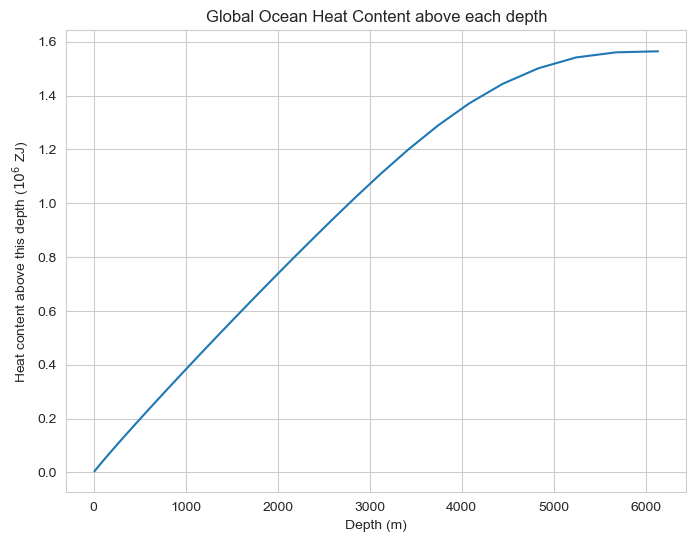

In [33]:
rho = 1026 #kg/m^3
c_p = 3990 #J/(kg K)

sns.set_style(style="whitegrid") #comment out if don't want seaborn background
fig,ax = plt.subplots(figsize=(8,6))
plt.plot(-theta_annual.Zu,(rho*c_p*theta_area_int*subset_theta.dZ).cumsum()/10**27)
plt.xlabel('Depth (m)')
plt.ylabel('Heat content above this depth ($10^6$ ZJ)')
plt.title('Global Ocean Heat Content above each depth')

We observe that much of the ocean's heat is concentrated in the upper ocean (where the line is steep), with less heat stored in the deepest ocean regions (where the line plateaus). At first glance, this seems consistent with our findings from the zonal mean plot, where upper ocean tends to be warmer. However, in the integral equation above, $\theta$ is not the only depth-dependent term. The global ocean area ($A$) also varies with depth, with the area of the global ocean decreasing at with depth until only the deepest trenches have water at that greatest ocean depths.

Let's explore whether the ocean heat content plot we just created is driven by temperature variations or global ocean area variations with depth. One way to do this is to calculate and plot an integral of the global ocean area between each depth and the surface (i.e., the volume of the ocean above a each depth): $Volume(z) = \iiint_{-z_1}^0 dz dA$.

If the volume as a function of depth looks similar to the heat content plot above, it would suggest that the  smaller heat content of the deeper ocean (i.e., the plateau at large depths) is caused by the relatively small volume of water contained at these depths, rather than the vertical variations in temperature.


Text(0.5, 1.0, 'Global ocean volume as a function of depth')

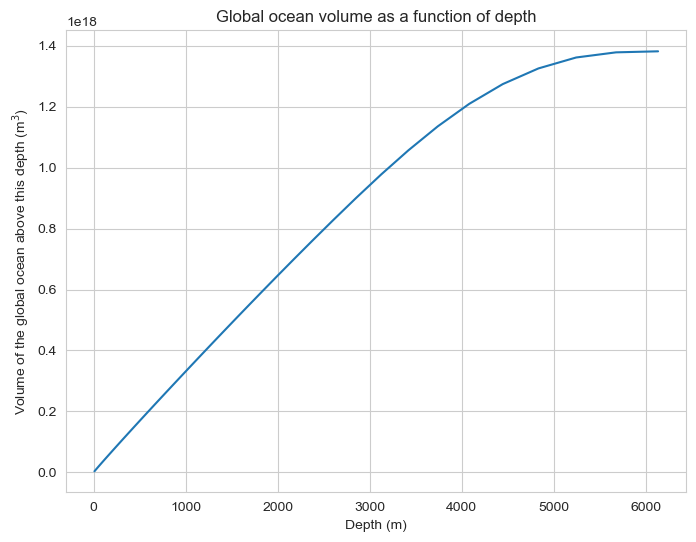

In [30]:
area_of_ocean=(subset_theta*subset_theta.dA/subset_theta).sum('latitude').sum('longitude') #we take an area integral first at each depth level

sns.set_style(style="whitegrid") #comment out if don't want seaborn background
fig,ax = plt.subplots(figsize=(8,6))
plt.plot(-theta_annual.Zu,(area_of_ocean*subset_theta.dZ).cumsum())
plt.xlabel('Depth (m)')
plt.ylabel('Volume of the global ocean above this depth (m$^3$)')
plt.title('Global ocean volume above each depth')

### Question 1: 

1. Based on the last two plots, are depth-variations in ocean heat content primarily due to vertical changes in the temperature or area of the ocean?


In [43]:
# to_remove explanation

"""
1. The volume as a function of depth has a shape that is almost identical to the ocean heat content plot, which indicates that the cumulative ocean heat content above each depth is primarily shaped by depth-variations in the global ocean's area.
""";

# Section 2: How is ocean heat content changing over time?

Let's examine how the total (i.e., full-depth) heat content of the ocean has changed over time. Additionally, we will diagnose the heat content of two specific upper-ocean layers: one above 700 m depth and another above 2000 m depth$^*$. By analyzing these near surface layers, we can identify whether changes in the ocean's heat content are evenly distributed through the water column.

$^*$*Note: technically the grid of the data means we will be looking above 677 m and 1997 m respectively*

In [10]:
#this cell may take a while to run!
rho = 1026 #kg/m^3
c_p = 3990 #J/(kg K)
global_heat=rho*c_p*((theta_annual*theta_annual.dZ*theta_annual.dA).sum('Z').sum('latitude').sum('longitude'))
global_heat_upper2000=rho*c_p*((theta_annual.where(theta_annual.Zu>-2000)*theta_annual.dZ*theta_annual.dA).sum('Z').sum('latitude').sum('longitude'))
global_heat_upper700=rho*c_p*((theta_annual.where(theta_annual.Zu>-700)*theta_annual.dZ*theta_annual.dA).sum('Z').sum('latitude').sum('longitude'))

heat_anom_fulldepth=global_heat-global_heat[0:5].mean() #remove first 5 year mean
heat_anom_upper2000=global_heat_upper2000-global_heat_upper2000[0:5].mean()
heat_anom_upper700=global_heat_upper700-global_heat_upper700[0:5].mean()

Text(0.5, 1.0, 'Change in heat over time')

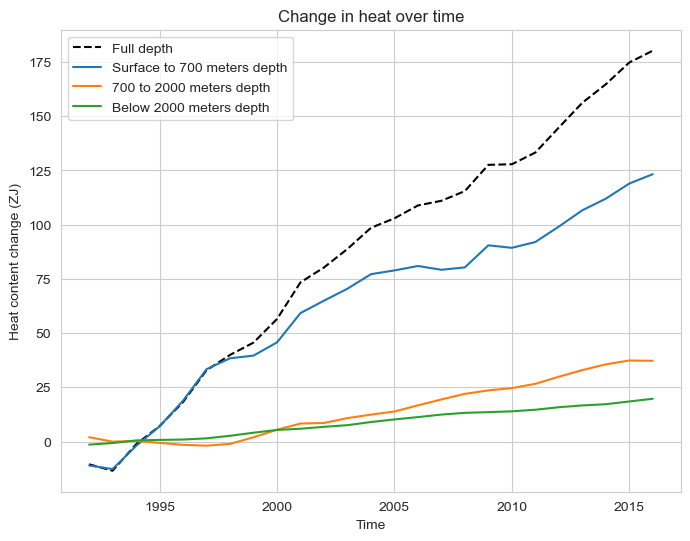

In [42]:
fig,ax = plt.subplots(figsize=(8,6))
sns.set_style(style="whitegrid") #comment out if don't want seaborn background
plt.plot(global_heat.year,heat_anom_fulldepth/10**21, 'k--')
plt.plot(global_heat.year,heat_anom_upper700/10**21)
plt.plot(global_heat.year,(heat_anom_upper2000-heat_anom_upper700)/10**21)
plt.plot(global_heat.year,(heat_anom_fulldepth-heat_anom_upper2000)/10**21)
plt.xlabel('Time')
plt.ylabel('Heat content change (ZJ)')
plt.legend(['Full depth','Surface to 700 meters depth','700 to 2000 meters depth', 'Below 2000 meters depth'])
plt.title('Change in heat over time')

We see that most of the ocean's heat gain has been within the upper ocean (shallower than 700 m). The deeper ocean has also warmed, but at a slower rate than the near-surface waters.

### Question 2: 

1. Based on this graph, what percentage of the ocean's heat gain since 1992 is contained within the top 2000 meters?


In [44]:
# to_remove explanation

"""
1. The total heat gain is around 180 ZJ, while the upper layers have gained roughly 130 ZJ (above 700 m) and 35 ZJ (700-2000 m). This means the upper 2000 m contain (130+35)/180 = 92% of the ocean's heat gain. 
""";

# Section 3: Spatial distribution of ocean heat content

We saw above that the ocean heat increase is concentrated near the ocean surface. Now let's look at where that heat is stored as a function of latitude and longitude. We can do this by creating a global map of ocean heat content in the upper 700 m of the ocean - which is essentially the same integral as above without the horizontal area integral: $\int_{-700m}^0 c_p\rho_0\theta(x,y,z) dz$

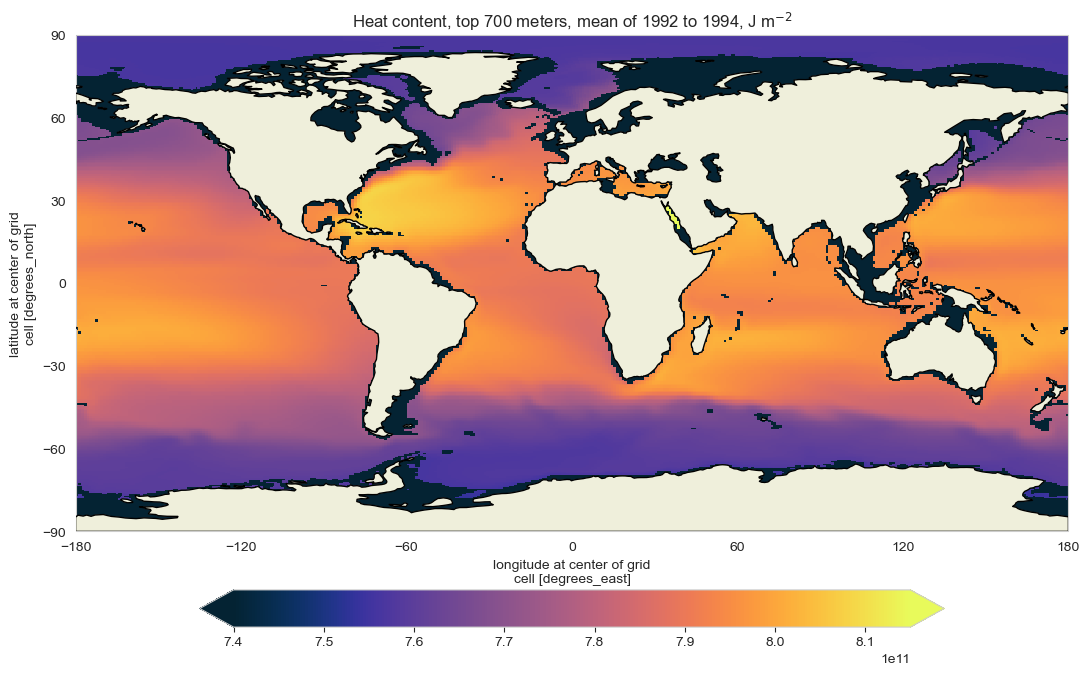

In [45]:
#First let's plot where heat is stored in the mean
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},figsize=(11,12),dpi=100) #this is from cartopy https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html
p=(((rho*c_p*subset_theta.where(-subset_theta.Zu<700)*subset_theta.dZ).sum('Z'))).plot(vmin=7.4E11,vmax=8.15E11,cmap=cmocean.cm.thermal,cbar_kwargs={'shrink':0.75,'orientation':'horizontal','extend':'both','pad':0.05,'label': ""})
ax.coastlines(color='grey',lw=0.5)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
plt.title('Ocean Heat Content of top 700 m per unit area, mean of 1992 to 1994, J m$^{-2}$')
fig.tight_layout()

The lower latitude ocean contains more heat than the higher latitudes. This finding is consistent with our previous plot of warmer waters near the Equator during this tutorial.

Now let's plot the spatial pattern of (full-depth) ocean heat content *rate of change* between 1992 and 2016.

In [75]:
# We already defined an object that's the mean over years 1992 to 1994 (subset_theta)
# Now define an object that's the mean over 2014 to 2016
subset_theta_future=theta_annual.sel(year=slice('2014', '2016')).mean('year')

length_of_time_period = 24*60*60*365*(2015-1993)

full_depth_heat_content_change = (rho*c_p*subset_theta_future*subset_theta_future.dZ).sum('Z')-(rho*c_p*subset_theta*subset_theta.dZ).sum('Z')
upper_700m_heat_content_change = (rho*c_p*subset_theta_future.where(-subset_theta.Zu<700)*subset_theta_future.dZ).sum('Z')-(rho*c_p*subset_theta.where(-subset_theta.Zu<700)*subset_theta.dZ).sum('Z')

<bound method Figure.tight_layout of <Figure size 1100x1200 with 4 Axes>>

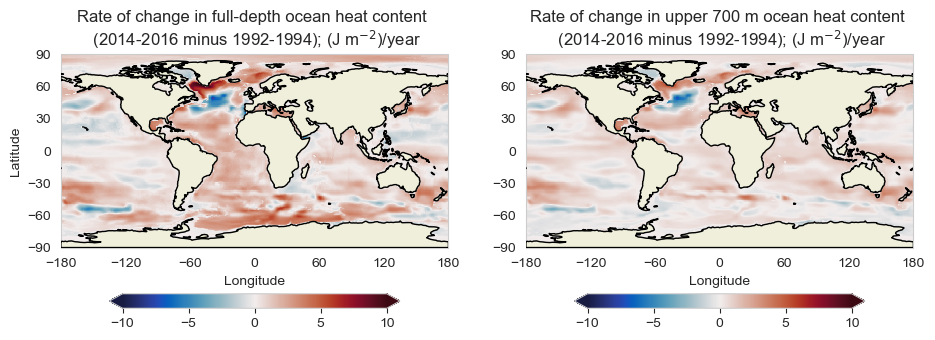

In [79]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection':ccrs.PlateCarree()},figsize=(11,12),dpi=100) #this is from cartopy https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html
(full_depth_heat_content_change/length_of_time_period).plot(ax=ax[0],vmin=-10,vmax=10,cmap=cmocean.cm.balance,cbar_kwargs={'shrink':0.75,'orientation':'horizontal','extend':'both','pad':0.05,'label': ""})
(upper_700m_heat_content_change/length_of_time_period).plot(ax=ax[1],vmin=-10,vmax=10,cmap=cmocean.cm.balance,cbar_kwargs={'shrink':0.75,'orientation':'horizontal','extend':'both','pad':0.05,'label': ""})
ax[0].coastlines(color='grey',lw=0.5)
ax[0].set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax[0].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax[0].add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
ax[0].set_title('Rate of change in full-depth ocean heat content \n (2014-2016 minus 1992-1994); (J m$^{-2}$)/year')
fig.tight_layout
ax[1].coastlines(color='grey',lw=0.5)
ax[1].set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax[0].set_ylabel('Latitude')
ax[1].set_ylabel('')
ax[0].set_xlabel('Longitude')
ax[1].set_xlabel('Longitude')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax[1].add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
ax[1].set_title('Rate of change in upper 700 m ocean heat content \n (2014-2016 minus 1992-1994); (J m$^{-2}$)/year')
fig.tight_layout

These plots demonstrate that ocean heat gain is not evenly distributed across space. When comparing the two plots, we once again see that the upper ocean contains a large fraction of the warming (recall that Equatorial regions contribute more to the global mean than high-latitude regions becasue of their relatively large area).

# Summary

Throughout this tutorial, we've investigated the spatial patterns and temporal changes of the ocean's heat content. We learned that the upper layers of the ocean contain most of the ocean's heat content, due to their relatively large area (and hence volume) compared to the deepest ocean layers. These upper layers also experience a disproportionately large fraction of the ocean warming that has been observed in recent decades. 

We also developed an understanding of ocean heat content calculation, considering the essential elements such as specific heat capacity, reference density, and temperature. Furthermore, we noticed that heat content distribution varies by latitude and longitude, typically being greater in the lower latitudes. Lastly, we highlighted that the ocean's heat gain isn't uniformly distributed across different oceanic regions.